In [3]:
#SCRIPT TO CREATE THE AUTOMATION FUNCTION
from tools import *

In [4]:
csv =pd.read_csv(r"C:\Users\cjang.WILDCAT\Desktop\eis\test", names = ['name', 'recal_indices', 'mask_choice'],index_col = 0, sep = " ", header = None)

In [5]:
csv.head()

,recal_indices,mask_choice
name,,
DE_104_10_30.mpt,[1],"[301.10504,39341.6554183904,0.0164047936644424..."
DE_49_5_30.mpt,NaN,1;
DE_40_8_60.mpt,"[2,1,0]","[43.7194276236431,147.21613849808,-38.42330064..."


In [6]:
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[1].name])

No handles with labels found to put in legend.


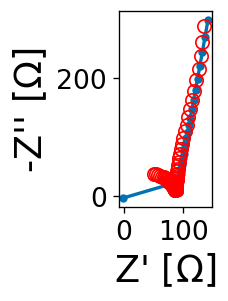

file    fit_Rs    fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_40_8_60.mpt -0.001684  88.29968  0.902427      NaN  9.705396e-09   

     fit_R2    fit_n2  fit_fs2    fit_Q2        fit_Q3  fit_n3  
0  62.19883  0.999935      NaN  0.000002  9.607947e-07     1.0  


In [51]:
#AUTO FUNCTION
for i in range(len(csv)):
    mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name])
    if len((csv.iloc[i].mask_choice.strip('[')).strip('];')) == 1:
        mask_choice = mpt.fast_mask()
        masked_mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
        if (csv.iloc[i].mask_choice.strip('[')).strip('];') == "1":
            if (csv.iloc[i].recal_indices.strip('[')).strip(']') != 'NaN':
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:
                        masked_mpt.df[0] = masked_mpt.df[0].drop(ind, axis = 0)
            else:
                continue
            print(masked_mpt.guesser())
            #print(len(masked_mpt.df[0]))
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "2":
            mask_choice = mpt.masker0()
            masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
            if (csv.iloc[i].recal_indices.strip('[')).strip(']') != 'NaN':
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:
                        masked_mpt.df[0] = masked_mpt.df[0].drop(ind, axis = 0)
            else:
                continue
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "3":
            mask_choice = mpt.masker()
            masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
            if (csv.iloc[i].recal_indices.strip('[')).strip(']') != 'NaN':
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:
                        masked_mpt.df[0] = masked_mpt.df[0].drop(ind, axis = 0)
            else:
                continue
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "4":
            if (csv.iloc[i].recal_indices.strip('[')).strip(']') != 'NaN':
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:
                        mpt.df[0] = mpt.df[0].drop(ind, axis = 0)
            else:
                continue
            print(mpt.guesser())
            print('here')
        else:
            print('bad masking choice')
    else:
        #print([float(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')])
        raw_window = [float(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')]
        #print(mpt.window_masker([raw_window[0],raw_window[1]], [raw_window[2],raw_window[3]]))
        mask_choice = mpt.window_masker([raw_window[0],raw_window[1]], [raw_window[2],raw_window[3]])
        masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
        if (csv.iloc[i].recal_indices.strip('[')).strip(']') != 'NaN':
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
        else:
            continue
        #print(len(masked_mpt.df[0]))
        #d = (masked_mpt.df[0])
        print(masked_mpt.guesser())